

#**Pediksi Angka Kelahiran di Jawa Barat**

## Import Library ...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

!pip install scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Menampilkan Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DESTYAWANSATRIA/Dataset/refs/heads/main/datapenduduk.csv')
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,status_kelahiran,jenis_kelamin,jumlah_kelahiran,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIDUP,LAKI-LAKI,61740,JIWA,2012
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIDUP,PEREMPUAN,49720,JIWA,2012
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,MATI,LAKI-LAKI,36,JIWA,2012
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,MATI,PEREMPUAN,47,JIWA,2012
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HIDUP,LAKI-LAKI,22812,JIWA,2012
...,...,...,...,...,...,...,...,...,...,...
1056,1057,32,JAWA BARAT,3278,KOTA TASIKMALAYA,MATI,PEREMPUAN,42,JIWA,2023
1057,1058,32,JAWA BARAT,3279,KOTA BANJAR,HIDUP,LAKI-LAKI,1448,JIWA,2023
1058,1059,32,JAWA BARAT,3279,KOTA BANJAR,HIDUP,PEREMPUAN,1279,JIWA,2023
1059,1060,32,JAWA BARAT,3279,KOTA BANJAR,MATI,LAKI-LAKI,19,JIWA,2023


In [ ]:
columns_to_use = ['nama_kabupaten_kota', 'status_kelahiran', 'jumlah_kelahiran', 'tahun']
filtered_df = df[columns_to_use]

filtered_df

,nama_kabupaten_kota,status_kelahiran,jumlah_kelahiran,tahun
0,KABUPATEN BOGOR,HIDUP,61740,2012
1,KABUPATEN BOGOR,HIDUP,49720,2012
2,KABUPATEN BOGOR,MATI,36,2012
3,KABUPATEN BOGOR,MATI,47,2012
4,KABUPATEN SUKABUMI,HIDUP,22812,2012
...,...,...,...,...
1056,KOTA TASIKMALAYA,MATI,42,2023
1057,KOTA BANJAR,HIDUP,1448,2023
1058,KOTA BANJAR,HIDUP,1279,2023
1059,KOTA BANJAR,MATI,19,2023


## Proses Assesing Data

In [ ]:
df.isna().sum()

,0
id,0
kode_provinsi,0
nama_provinsi,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
status_kelahiran,0
jenis_kelamin,0
jumlah_kelahiran,0
satuan,0
tahun,0


In [ ]:
df.dtypes


,0
id,int64
kode_provinsi,int64
nama_provinsi,object
kode_kabupaten_kota,int64
nama_kabupaten_kota,object
status_kelahiran,object
jenis_kelamin,object
jumlah_kelahiran,int64
satuan,object
tahun,int64


In [ ]:
df.isnull().sum()

,0
id,0
kode_provinsi,0
nama_provinsi,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
status_kelahiran,0
jenis_kelamin,0
jumlah_kelahiran,0
satuan,0
tahun,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1061 non-null   int64 
 1   kode_provinsi        1061 non-null   int64 
 2   nama_provinsi        1061 non-null   object
 3   kode_kabupaten_kota  1061 non-null   int64 
 4   nama_kabupaten_kota  1061 non-null   object
 5   status_kelahiran     1061 non-null   object
 6   jenis_kelamin        1061 non-null   object
 7   jumlah_kelahiran     1061 non-null   int64 
 8   satuan               1061 non-null   object
 9   tahun                1061 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 83.0+ KB
None


## Pengelompokan data Jumlah kelahiran pertahun

In [ ]:
df['jumlah_kelahiran'] = pd.to_numeric(df['jumlah_kelahiran'], errors='coerce')

In [ ]:
data = df[df['status_kelahiran'] == 'HIDUP']

In [ ]:
Sdata_per_year = df.groupby(['tahun']).sum()['jumlah_kelahiran'].reset_index()
print(data_per_year)

    tahun  jumlah_kelahiran
0    2012            406544
1    2013            352204
2    2014            333441
3    2015            896063
4    2016            856299
5    2017            917556
6    2018            911763
7    2019            825491
8    2020            789541
9    2021            867490
10   2022            832267
11   2023            820059


## Visualisasi Data

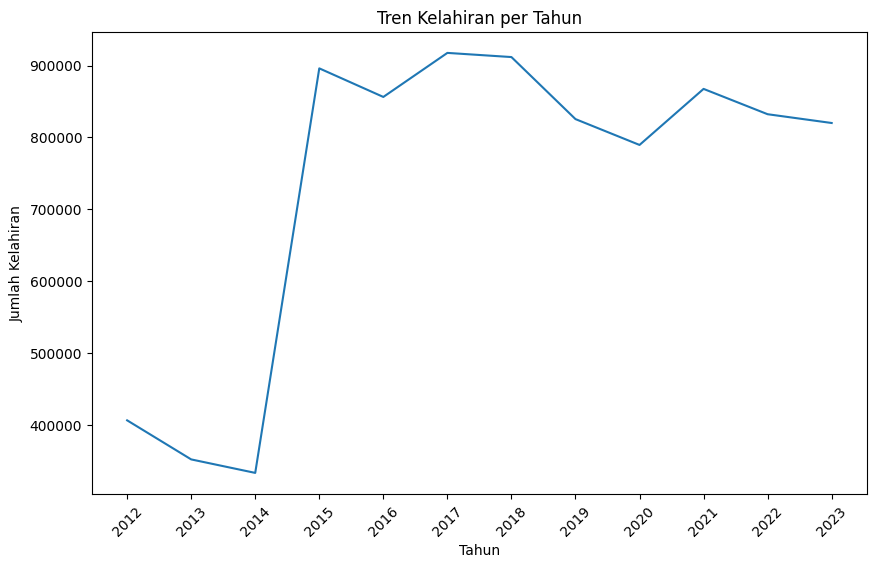

In [ ]:
# Visualisasi tren kelahiran per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_per_year, x='tahun', y='jumlah_kelahiran', markers='o')
plt.title('Tren Kelahiran per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kelahiran')
plt.xticks(ticks=data_per_year['tahun'], rotation=45)
plt.show()


## Menghitung Outlier

In [ ]:

# Misalkan df adalah DataFrame Anda dan 'jumlah_kelahiran' adalah kolom yang ingin diperiksa
Q1 = df['jumlah_kelahiran'].quantile(0.25)
Q3 = df['jumlah_kelahiran'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['jumlah_kelahiran'] < batas_bawah) | (df['jumlah_kelahiran'] > batas_atas)]

print("Outliers:")
print(outliers)

Outliers:
        id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0        1             32    JAWA BARAT                 3201   
1        2             32    JAWA BARAT                 3201   
38      39             32    JAWA BARAT                 3201   
39      40             32    JAWA BARAT                 3201   
86      87             32    JAWA BARAT                 3201   
87      88             32    JAWA BARAT                 3201   
126    127             32    JAWA BARAT                 3201   
127    128             32    JAWA BARAT                 3201   
178    179             32    JAWA BARAT                 3216   
179    180             32    JAWA BARAT                 3216   
222    223             32    JAWA BARAT                 3201   
223    224             32    JAWA BARAT                 3201   
274    275             32    JAWA BARAT                 3216   
275    276             32    JAWA BARAT                 3216   
318    319             32    J

## Prediksi jumlah kelahiran



### 1.   Proses training dataset


*   Menggunakan data dari tahun 2012 - 2022 sebagai data training
*   Menggunakan data 2023 sebagai data test





In [ ]:
# Agregasi data per kabupaten dan tahun
df_grouped = df.groupby(["tahun", "nama_kabupaten_kota"])["jumlah_kelahiran"].sum().reset_index()

# Pisahkan data untuk pelatihan dan pengujian
df_train = df_grouped[df_grouped['tahun'] < 2023]  # Data pelatihan dari 2012-2022
df_test = df_grouped[df_grouped['tahun'] == 2023]  # Data pengujian untuk 2023

# Buat model prediksi untuk setiap kabupaten
prediksi_total = {}
actual_total = {}

# Loop melalui setiap kabupaten untuk pelatihan dan pengujian
for kabupaten in df_train['nama_kabupaten_kota'].unique():
    df_kabupaten_train = df_train[df_train['nama_kabupaten_kota'] == kabupaten]

    # Siapkan data untuk model
    X_train = df_kabupaten_train['tahun'].values.reshape(-1, 1)  # Tahun
    y_train = df_kabupaten_train['jumlah_kelahiran'].values  # Jumlah kelahiran

    # Melatih model regresi linier
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediksi untuk tahun 2023
    X_test = np.array([[2023]])
    prediksi_2023 = model.predict(X_test)
    prediksi_total[kabupaten] = prediksi_2023[0]

    # Simpan nilai aktual untuk evaluasi
    actual_total[kabupaten] = df_test[df_test['nama_kabupaten_kota'] == kabupaten]['jumlah_kelahiran'].values[0]

# Hitung total prediksi dan total aktual untuk seluruh Jawa Barat
total_prediksi = sum(prediksi_total.values())
total_aktual = sum(actual_total.values())

print("Prediksi jumlah kelahiran di tahun 2023 per kabupaten:")
for kabupaten, prediksi in prediksi_total.items():
    print(f"{kabupaten}: {prediksi}")

print(f"\nTotal prediksi kelahiran di Jawa Barat pada tahun 2023: {total_prediksi}")
print(f"Total aktual kelahiran di Jawa Barat pada tahun 2023: {total_aktual}")


Prediksi jumlah kelahiran di tahun 2023 per kabupaten:
KABUPATEN BANDUNG BARAT: 28527.666666666686
KABUPATEN BEKASI: 76371.52234636887
KABUPATEN BOGOR: 113664.12727272743
KABUPATEN INDRAMAYU: 28654.941058940953
KABUPATEN MAJALENGKA: 19135.299700299744
KABUPATEN SUKABUMI: 30033.875
KABUPATEN TASIKMALAYA: 27916.75757575757
KOTA CIMAHI: 10468.322677322678
KOTA CIREBON: 5032.254545454547
KOTA DEPOK: 43373.0
KABUPATEN PANGANDARAN: 5751.048387096787
KABUPATEN SUMEDANG: 16733.333333333256
KOTA BANJAR: 2469.1329787234135
KOTA BOGOR: 18438.399999999965
KOTA SUKABUMI: 5426.783870967745
KOTA TASIKMALAYA: 10823.466666666616
KABUPATEN KUNINGAN: 17170.19444444438
KABUPATEN PURWAKARTA: 15986.833333333489
KABUPATEN BANDUNG: 62471.17857142864
KABUPATEN CIAMIS: 17715.206521739077
KABUPATEN GARUT: 48763.31506849313
KABUPATEN KARAWANG: 35878.53571428545
KABUPATEN SUBANG: 28261.71428571432
KOTA BANDUNG: 31804.964285714086
KOTA BEKASI: 42767.5
KABUPATEN CIANJUR: 31975.266666666605
KABUPATEN CIREBON: 44301.6

In [ ]:
# Evaluasi hasil prediksi
mae = mean_absolute_error(list(actual_total.values()), list(prediksi_total.values()))
mse = mean_squared_error(list(actual_total.values()), list(prediksi_total.values()))
rmse = np.sqrt(mse)
r2 = r2_score(list(actual_total.values()), list(prediksi_total.values()))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2221.7856511120835
Mean Squared Error (MSE): 13181492.382791372
Root Mean Squared Error (RMSE): 3630.6325045081844
R-squared (R²): 0.9758144401761352


### Akurasi Training Data mendekati 1 yaitu **0.9758144401761352** yang artinya sangat akurat



### 2.   Prediksi Jumlah kelahiran ditahun 2024



In [ ]:
# Buat model prediksi untuk setiap kabupaten
prediksi_total = {}

# Loop melalui setiap kabupaten untuk prediksi
for kabupaten in df_grouped['nama_kabupaten_kota'].unique():
    df_kabupaten = df_grouped[df_grouped['nama_kabupaten_kota'] == kabupaten]

    # Siapkan data untuk model
    X = df_kabupaten['tahun'].values.reshape(-1, 1)  # Tahun
    y = df_kabupaten['jumlah_kelahiran'].values  # Jumlah kelahiran

    # Melatih model regresi linier
    model = LinearRegression()
    model.fit(X, y)

    # Prediksi untuk tahun 2024
    prediksi_2024 = model.predict(np.array([[2024]]))
    prediksi_total[kabupaten] = prediksi_2024[0]

# Hitung total prediksi untuk seluruh Jawa Barat
total_prediksi = sum(prediksi_total.values())

print("Prediksi jumlah kelahiran di tahun 2024 per kabupaten:")
for kabupaten, prediksi in prediksi_total.items():
    print(f"{kabupaten}: {prediksi}")

print(f"\nTotal prediksi kelahiran di Jawa Barat pada tahun 2024: {total_prediksi}")

Prediksi jumlah kelahiran di tahun 2024 per kabupaten:
KABUPATEN BANDUNG BARAT: 28737.73458646622
KABUPATEN BEKASI: 76215.34005763684
KABUPATEN BOGOR: 111051.7727272727
KABUPATEN INDRAMAYU: 26480.346423562383
KABUPATEN MAJALENGKA: 18612.636746143107
KABUPATEN SUKABUMI: 32833.049180327915
KABUPATEN TASIKMALAYA: 26798.858646616573
KOTA CIMAHI: 10311.029453015435
KOTA CIREBON: 4854.560606060608
KOTA DEPOK: 43594.13636363635
KABUPATEN PANGANDARAN: 5540.742424242431
KABUPATEN SUMEDANG: 16053.454545454588
KOTA BANJAR: 2552.3333333333358
KOTA BOGOR: 18290.0
KOTA SUKABUMI: 5318.863636363647
KOTA TASIKMALAYA: 10645.872727272683
KABUPATEN KUNINGAN: 16202.399999999907
KABUPATEN PURWAKARTA: 15840.733333333395
KABUPATEN BANDUNG: 60714.86111111101
KABUPATEN CIAMIS: 16800.22505307861
KABUPATEN GARUT: 45851.16666666651
KABUPATEN KARAWANG: 34211.22222222248
KABUPATEN SUBANG: 25462.833333333256
KOTA BANDUNG: 31354.25
KOTA BEKASI: 42071.47222222248
KABUPATEN CIANJUR: 35134.57142857148
KABUPATEN CIREBON: 